# Part 1: Regression

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [124]:
# Load in Boston dataset
from sklearn.datasets import load_boston
bdata = load_boston()
X = bdata.data
y = bdata.target
boston = pd.DataFrame(data = bdata.data)
boston.columns = bdata.feature_names[:]
boston['MEDV'] = bdata.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Relevant Methods to Predict MEDV: 

**kNN Regressor**

Strengths: It does not require any assumptions and it is easy to implement. It also doesn't straight up build a model since it uses historical data to "teach" new data entries. 

Weaknesses: This algorithm is slow and requires a lot of memory. It is also sensitive to outliers in the data since that requires a distance criteria to choose from. 

Important Hyperparameters: k number of neighbors 

**Decision Trees**

Strengths: They are able to fit on and learn non-linear relationships and are fairly robust to outliers. They are intuitive to understand and explain as well and also don't requite a lot of data preparation before using the model. 

Weaknesses: They tend to overfit on training data if the decision tree has not been properly pruned which can cause them to become poor predictors of the data. 

Important Hyperparameters:
* max_features - represents the number of features to consider 
* max_depth - represents how deep the tree can be
* min_samples_leaf - represents the minimum number of samples required to be at leaf node

**Naive Bayes**

Strengths: This algorithm is easy to use and implement. It is also easily scalable with the dataset so there are no limitations on size when it comes to using Naive Bayes.

Weaknesses: It makes strong assumptions on the shape of the data. The data also requires a binary approach in that probabilities should either be 0 or 1 which can not be as flexible with the data.

Important Hyperparameter: Alpha 

**Regression (Linear)**

Strengths: This is the easiest method to implement and understand. It works for most datasets and there is usually a relationship between two variables within the dataset, whether it be a positive or negative relationship.

Weaknesses: It truly only models relationships that are between dependent and independent variables. They are also extremely sensitive to outliers so it is not always the best choice as a predictor.

Important Hyperparameters: None really required



Citations: 
https://elitedatascience.com/machine-learning-algorithms
https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
https://www.quora.com/What-are-the-advantages-and-disadvantages-of-linear-regression

## Predicting MEDV: k-NN, Decision Trees & OLS
#### The cross-validation code used for k-NN and Decision Tree algorithms were implemented by prior coursework in Professor Freeman's 370 lecture.

### METHOD 1: k-NN Regressor

In [57]:
from sklearn.model_selection import train_test_split 
train_features, test_feature, train_outcome, test_outcome = train_test_split(X, y, 
                                                                             test_size = 0.3,
                                                                             random_state = 11)

In [76]:
# Param grid to select best number of neighbors
from sklearn.neighbors import KNeighborsRegressor
params = {"n_neighbors":range(1,50), "weights":["uniform", "distance"]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid = params, cv=folds, return_train_score=True)
grid_search.fit(train_features, train_outcome)
score = grid_search.score(test_feature, test_outcome)
print(grid_search.cv_results_['params'][grid_search.best_index_])

{'n_neighbors': 9, 'weights': 'distance'}


In [99]:
# Use param grid best score in knn regressor algorithm
knn_preds = knn_reg.fit(train_features, train_outcome).predict(test_feature)
knn_reg = KNeighborsRegressor(n_neighbors=9)
knn_fit = knn_reg.fit(train_features, train_outcome)
folds = KFold(n_splits = 10, shuffle = True)
print(np.mean(cross_val_score(knn_reg, train_features, train_outcome, cv = folds)))

0.4264709279694928


### METHOD 2: Decision Tree Regressor

In [94]:
# Param grid to select best maximum features
from sklearn.tree import DecisionTreeRegressor
params = {"max_features":range(1,10)}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid = params, cv=folds, return_train_score=True)
grid_search.fit(train_features, train_outcome)
score = grid_search.score(test_feature, test_outcome)
print(grid_search.cv_results_['params'][grid_search.best_index_])


{'max_features': 4}


In [110]:
# Use param grid best score in decision tree regressor algorithm
tree_reg = DecisionTreeRegressor(max_features=4)
tree_fit = tree_reg.fit(train_features, train_outcome)
tree_preds = tree_fit.predict(test_feature)
print(np.mean(cross_val_score(tree_reg, train_features, train_outcome)))

0.582180759932143


### METHOD 3: OLS (Linear Regression)

In [55]:
# Linear Regression: sourced from Lab 4 
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'MEDV ~ RM', 
             data=boston).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           2.49e-74
Time:                        17:59:11   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

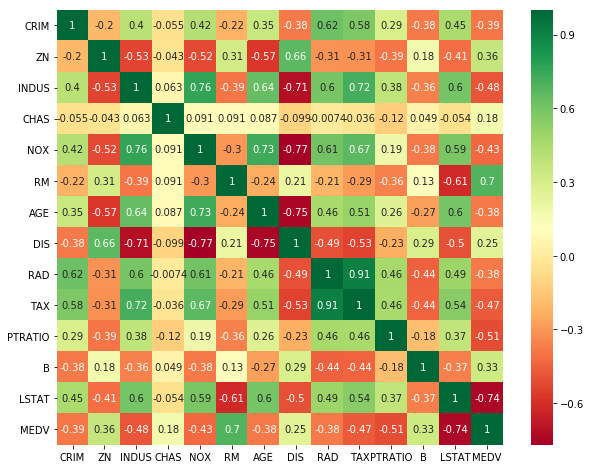

In [116]:
# Correlation matrix for features
import matplotlib.pyplot as plt
import seaborn as sns
ax, fig = plt.subplots(figsize=(10,8))
corr_matrix = boston.corr()
sns.heatmap(data=corr_matrix, cmap="RdYlGn", annot = True)

R-squared for the relationship between MEDV and RM is 0.48. Linear regression does not require hyperparameters so the best way to cross-validate the relevant measure is by checking the correlation matrix to check correlation values and perform feature selection throught that.

## Method Summaries: 

In [115]:
print('k-NN Score:',np.mean(cross_val_score(knn_reg, train_features, train_outcome, cv = folds)))
print('Decision Tree Score:',np.mean(cross_val_score(tree_reg, train_features, train_outcome)))
print('OLS R2 Value:', lm.rsquared)

k-NN Score: 0.44903852025810825
Decision Tree Score: 0.5379833640329555
OLS R2 Value: 0.483525455991334


Based on the method summary results, I found that the Decision Tree Regressor algorithm had the best score in predicting MEDV values. I believe this did better than the other two algorithms because it is able to perform on non-linear relationships and is not sensitive to outliers. kNN and OLS are both sensitive to outliers which may have skewed the scores and may not be an accurate representation.

# Part 2: Text Classification

In [117]:
# Load in text dataset
data = pd.read_csv('20-newsgroups.csv')
working, testing = train_test_split(data, test_size=0.80, random_state=42)
testing.to_csv('testing.csv', index = False)
del(testing)
working.shape

(3999, 2)

>I chose to work with 20% of the working data which has about 4,000 rows.

In [118]:
# Removing null values from dataset
working = working.dropna()

In [13]:
# Bag of Words 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0)
vectorizer.fit(working.text.values)
X = vectorizer.transform(working.text.values).toarray()
X.shape

(3987, 55656)

In [19]:
# k-NN algorithm for Bag of Words
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1, 10)
for i in k_values:
    neighbors = KNeighborsClassifier(n_neighbors = i, metric = 'cosine')
    neighbors.fit(X, working.group.values)
    CV_score = cross_val_score(neighbors, X, working.group.values, cv = 3)
    print('K:', i)
    print(CV_score)


K: 1
[0.34056886 0.31052632 0.31945496]
K: 2
[0.31362275 0.26992481 0.29371688]
K: 3
[0.29191617 0.25789474 0.2657078 ]
K: 4
[0.27919162 0.2443609  0.24905375]
K: 5
[0.25598802 0.23233083 0.23845572]
K: 6
[0.24176647 0.21879699 0.23542771]
K: 7
[0.23952096 0.20902256 0.23921272]
K: 8
[0.23802395 0.21203008 0.22710068]
K: 9
[0.23128743 0.21578947 0.22104466]


From the possible k values between 1-10, a value of 1 had the best cross validation score.

In [23]:
# TF-IDF vectorizer for Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_X = vectorizer.fit_transform(working.text.values)
tf_X.shape

(3987, 55656)

In [24]:
# TF-IDF algorithm for Bag of Words
k_values = range(1, 10)
for i in k_values:
    neighbors = KNeighborsClassifier(n_neighbors = i, metric = 'cosine')
    neighbors.fit(tf_X, working.group.values)
    CV_score = cross_val_score(neighbors, tf_X, working.group.values, cv = 3)
    print('K:', i)
    print(CV_score)


K: 1
[0.60553892 0.57142857 0.5677517 ]
K: 2
[0.55763473 0.48721805 0.49810749]
K: 3
[0.55838323 0.49022556 0.49280848]
K: 4
[0.54865269 0.50225564 0.4988645 ]
K: 5
[0.53143713 0.48646617 0.48750946]
K: 6
[0.52320359 0.47593985 0.49053747]
K: 7
[0.52245509 0.46842105 0.48599546]
K: 8
[0.51796407 0.47067669 0.48978047]
K: 9
[0.51721557 0.46992481 0.48599546]


Based on the TF-IDF vectorizer, a k value of 1 outputs the highest cross-validation score of 0.61.

In [26]:
# Naive Bayes implementation on Bag of Words
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, working.group.values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
# Find optimal smoothing parameter for Naive Bayes
alphas = np.linspace(0, 2, 10)
for i in alphas:
    clf = MultinomialNB(alpha = i, class_prior = None, fit_prior = True)
    clf.fit(X, working.group.values)
    CV_score = cross_val_score(clf, X, working.group.values, cv = 3)
    print("Alphas:", i)
    print(CV_score)


/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alphas: 0.0
[0.69535928 0.68421053 0.6987131 ]
Alphas: 0.2222222222222222
[0.71856287 0.69774436 0.70552612]
Alphas: 0.4444444444444444
[0.66991018 0.64511278 0.62376987]
Alphas: 0.6666666666666666
[0.60479042 0.57368421 0.53898562]
Alphas: 0.8888888888888888
[0.53293413 0.4924812  0.4670704 ]
Alphas: 1.1111111111111112
[0.49401198 0.41804511 0.40499621]
Alphas: 1.3333333333333333
[0.46257485 0.37819549 0.36941711]
Alphas: 1.5555555555555554
[0.42814371 0.34360902 0.33838002]
Alphas: 1.7777777777777777
[0.3989521  0.31278195 0.30431491]
Alphas: 2.0
[0.36676647 0.28571429 0.28236185]


The best optimal smoothing parameter from the Naive Bayes implementation was 0.22. 

## Results:

Between k-NN, TF-IDF and Naive Bayes, Naive Bayes performed the best. I got accuracies around 71% with an alpha value of 0.20. k-NN had the highest accuracy of 35% with n_neighbors = 1 and TF-IDF had the highest accuracy of 60% also with a n_neighbors value of 1. Speed wise, TF-IDF performed the fastest since it was a sparse matrix. 

In [120]:
# Load in testing data
testing = pd.read_csv("testing.csv")
testing = testing.dropna()
testing.shape

(15969, 2)

In [121]:
# Convert new Bag of Words for testing data
X_final = vectorizer.fit(working.text.values)
X_final = vectorizer.transform(testing.text.values)
X_final = X_final.toarray()

In [122]:
# Use Naive Bayes algorithm on testing data 
clf = MultinomialNB(alpha = 0.20, class_prior = None, fit_prior = True)
clf.fit(X_final, testing.group.values)
preds = clf.predict(X_final)

from sklearn.metrics import accuracy_score

score = accuracy_score(testing.group.values, preds)
print("Final accuracy for testing data with Naive Bayes:", score)



Final accuracy for testing data with Naive Bayes: 0.9324315861982592


In [45]:
# Find misclassified quotes 
misclassified = (preds!=testing.group.values)
text = testing[misclassified]
print(text[:5])   

                 group                                               text
22           sci.crypt   (Robert Ward) writes: In article writes: and ...
30  talk.religion.misc  Brian Kendig writes:  Lev 17:11: For the life ...
41         alt.atheism   (Turin Turambar, ME Department of Utter Miser...
59  talk.religion.misc  In article   (Bill Carlson) writes:  Since eve...
73  talk.religion.misc   (Jon Livesey) writes:  Not, of course, The Gr...


### Reasoning behind Misclassified Quotes: 
These texts may have been misclassified due to the fact that the data contains single quotes from extracted from the full group ones. It is difficult to decipher what  actual groupings the text belongs in based on a few sentences since we do not have the bigger picture. In addition to this, there could be an equal number of terms that could fit between two or more groups (or a very slim difference) that could confuse the classifier. Based on this, it is not uncommon to see some of the texts have been misclassified.

## Statement of Compliance

I affirm that I have had no conversation regarding this exam with any persons other than the instructor or the teaching assistant. Further, I certify that the attached work represents my own thinking. Any
information, concepts, or words that originate from other sources are cited in accordance with University
of Washington guidelines as published in the Academic Code (available on the course website). I am
aware of the serious consequences that result from improper discussions with others or from the improper
citation of work that is not my own.

Nicole Bohra

March 17, 2019